In [1]:
from dotenv import load_dotenv
import os

load_dotenv()  # Lädt die Variablen aus der .env-Datei

api_key = os.getenv('DUNE_API_KEY')


In [2]:
from dune_client.types import QueryParameter
from dune_client.client import DuneClient
from dune_client.query import QueryBase

In [3]:
query = QueryBase(
    name="Sample Query",
    query_id=3423250,
    params=[
        QueryParameter.text_type(name="Address", value="0xd8da6bf26964af9d7eed9e03e53415d37aa96045")
    ],
)

In [4]:
print("Results available at", query.url())

Results available at https://dune.com/queries/3423250?Address=0xd8da6bf26964af9d7eed9e03e53415d37aa96045


In [ ]:
dune = DuneClient.from_env()
results_df = dune.run_query_dataframe(query)

In [6]:
print(results_df.head())

                    block_time  cum_gasfees
0  2015-10-01 18:08:05.000 UTC     0.008187
1  2015-10-01 18:34:11.000 UTC     0.018176
2  2015-10-01 18:37:53.000 UTC     0.023425
3  2015-10-01 18:41:26.000 UTC     0.025137
4  2015-10-01 18:42:47.000 UTC     0.028390


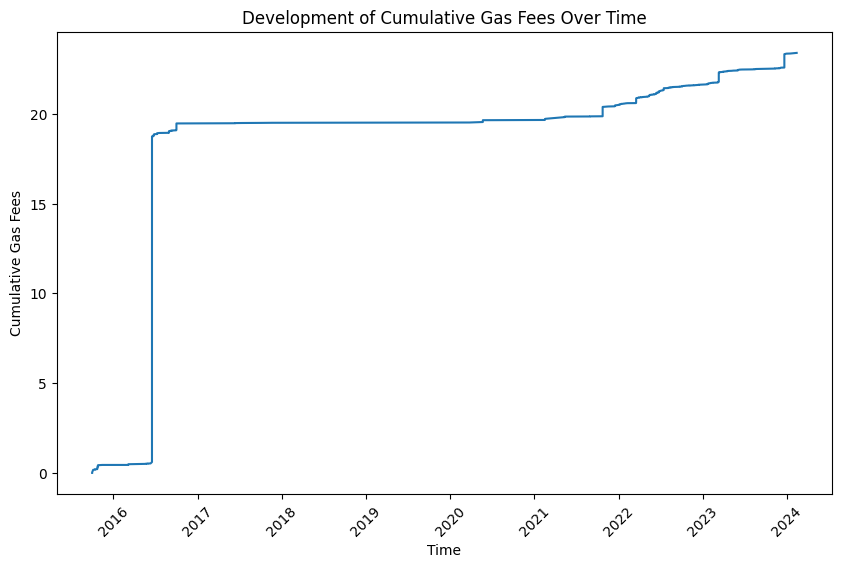

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

results_df['block_time'] = pd.to_datetime(results_df['block_time'])

plt.figure(figsize=(10, 6))
plt.plot(results_df['block_time'], results_df['cum_gasfees'])
plt.title('Development of Cumulative Gas Fees Over Time')
plt.xlabel('Time')
plt.ylabel('Cumulative Gas Fees')
plt.xticks(rotation=45)
plt.show()